# Week 3 Notebook: Exploratory Data Analysis (EDA)
The goal of this week's assignment is to split the dataset into training, validation, and test datasets, conduct exploratory data analysis (EDA) on the training data, and identify issues in the dataset that need to be fixed.

This notebook focuses on exploring our options for handling missing values and understanding our highly correlated independent variables. 

## Import packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data as dataframe

In [8]:
#current_dir = os.getcwd()
#parent_dir = os.path.dirname(current_dir)

#data_folder = os.path.join(parent_dir,"data")
#raw_data_folder = os.path.join(data_folder,"raw")

#raw_data_file = os.path.join(raw_data_folder,"rideshare_kaggle.csv")

In [9]:
#df = pd.read_csv(raw_data_file)

In [10]:
# Load the data as a pandas dataframe.
df = pd.read_csv('rideshare_kaggle.csv')

## Generate training, testing, and validation data sets
- training set is 70% of the dataframe
- validation set is 20% of the dataframe
- test set is 10% of the dataframe

In [11]:
# Shuffle the dataframe
df = df.sample(frac=1, random_state=123)

# Calculate the sizes of validation and test sets
val_size = int(len(df) * 0.2)
test_size = int(len(df) * 0.1)

# Select rows based on the val_size and test_size to store as train set, val set, and test set
train_df = df.iloc[val_size + test_size:]
val_df = df.iloc[:val_size]
test_df = df.iloc[val_size:val_size + test_size]


### Check for Data Types

In [12]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [13]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col = [
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']
num_col = [col for col in df.columns if col not in cat_col]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")

cat_col = 9
num_col = 48



## Missing Values
- The target variable `price` has 55,095 missing values which we need to decide how to deal with in data preparation. 
- We can either impute it or drop the rows.
- Typically, another option is to drop a column if it has too many missing values. Since `price` is our dependent variable, this is not an option. 

In [14]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Let's take a quick look at rows with missing price.

In [15]:
df_na = df[df['price'].isna()]

In [16]:
df_na.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
159582,dd07caca-ea73-4725-8e50-fad3321be24d,1.543326e+09,13,27,11,2018-11-27 13:45:22,America/New_York,Boston University,Theatre District,Uber,...,0.1429,1543338000,36.37,1543377600,47.06,1543320000,32.40,1543377600,44.15,1543320000
661848,dab5db1f-a5fb-4e35-a3d5-40ab0c2d1c98,1.545030e+09,6,17,12,2018-12-17 06:55:08,America/New_York,Financial District,North End,Uber,...,0.0182,1545066000,34.25,1545044400,41.38,1545076800,28.30,1545044400,35.88,1545076800
77825,dd8d7b61-5113-462e-8504-321b7629185f,1.543513e+09,17,29,11,2018-11-29 17:32:58,America/New_York,Northeastern University,West End,Uber,...,0.0000,1543510800,34.83,1543550400,45.03,1543510800,30.90,1543550400,38.93,1543510800
180484,604c86db-4113-4249-bfcf-1c2fbc0ce058,1.544918e+09,0,16,12,2018-12-16 00:00:14,America/New_York,Financial District,South Station,Uber,...,0.0074,1544893200,39.54,1544929200,54.47,1544896800,36.46,1544929200,53.80,1544896800
163722,52bdcd08-12b8-4d13-af13-42511f03fd17,1.543421e+09,16,28,11,2018-11-28 16:01:25,America/New_York,Financial District,Boston University,Uber,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800


In [17]:
# Check the percentage of missing values in 'price'
missing_percentage = df['price'].isna().sum() / len(df) * 100
print(f"Percentage of missing values in 'price': {missing_percentage:.2f}%")

Percentage of missing values in 'price': 7.95%


These 55,095 rows (roughly 8% of the dataframe) with missing values for `price` are one of the major obstacles of this dataset. 

### Missing Values Option 1: 
Remove rows with missing `price` values.

In [18]:
df_dropped = df.dropna(subset=['price'])
print(f"Shape after dropping rows with missing 'price': {df_dropped.shape}")

Shape after dropping rows with missing 'price': (637976, 57)


### Missing Values Option 2: 
Fill missing `price` values with mean, median, or mode.

In [19]:
# Fill with mean
df_filled_mean = df.copy()
df_filled_mean['price'].fillna(df_filled_mean['price'].mean(), inplace=True)

# Fill with median
df_filled_median = df.copy()
df_filled_median['price'].fillna(df_filled_median['price'].median(), inplace=True)

# Fill with mode
df_filled_mode = df.copy()
df_filled_mode['price'].fillna(df_filled_mode['price'].mode()[0], inplace=True)

### Visualize the distribution of `price` after each imputation to compare

c:\Users\holly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\holly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\holly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\holly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

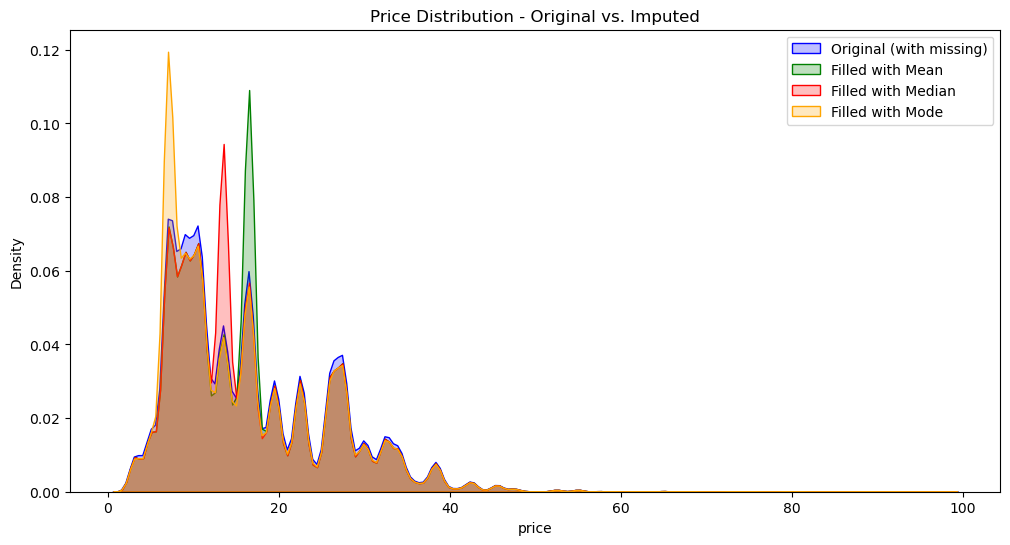

In [20]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['price'], label='Original (with missing)', color='blue', fill=True)
sns.kdeplot(df_filled_mean['price'], label='Filled with Mean', color='green', fill=True)
sns.kdeplot(df_filled_median['price'], label='Filled with Median', color='red', fill=True)
sns.kdeplot(df_filled_mode['price'], label='Filled with Mode', color='orange', fill=True)

plt.title('Price Distribution - Original vs. Imputed')
plt.legend()
plt.show()

It may also be helpful to try to understand the distribution of the categorical and numerical variables when 'price' is missing.

In [21]:
# Summary statistics for numerical variables when 'price' is missing
print(df_na[num_col].describe())

          timestamp          hour           day         month  price  \
count  5.509500e+04  55095.000000  55095.000000  55095.000000    0.0   
mean   1.544046e+09     11.626191     17.756040     11.588238    NaN   
std    6.890791e+05      6.940503      9.984649      0.492157    NaN   
min    1.543204e+09      0.000000      1.000000     11.000000    NaN   
25%    1.543444e+09      6.000000     13.000000     11.000000    NaN   
50%    1.543739e+09     12.000000     17.000000     12.000000    NaN   
75%    1.544828e+09     18.000000     28.000000     12.000000    NaN   
max    1.545161e+09     23.000000     30.000000     12.000000    NaN   

           distance  surge_multiplier      latitude     longitude  \
count  55095.000000           55095.0  55095.000000  55095.000000   
mean       2.191383               1.0     42.338303    -71.066230   
std        1.178985               0.0      0.047654      0.020286   
min        0.020000               1.0     42.214800    -71.105400   
25%   

In [22]:
# Iterate over each categorical column and print the value counts
for column in cat_col:
    print(f"Counts for {column} when 'price' is missing:")
    print(df_na[column].value_counts())
    print("\n")

Counts for timezone when 'price' is missing:
timezone
America/New_York    55095
Name: count, dtype: int64


Counts for source when 'price' is missing:
source
Financial District         4660
Theatre District           4612
Boston University          4592
Northeastern University    4592
North End                  4592
Back Bay                   4591
Fenway                     4591
South Station              4590
Haymarket Square           4589
West End                   4582
Beacon Hill                4562
North Station              4542
Name: count, dtype: int64


Counts for destination when 'price' is missing:
destination
Financial District         4659
Theatre District           4609
Boston University          4593
Haymarket Square           4593
North End                  4592
Fenway                     4591
South Station              4590
Back Bay                   4590
Northeastern University    4590
West End                   4583
Beacon Hill                4563
North Station     

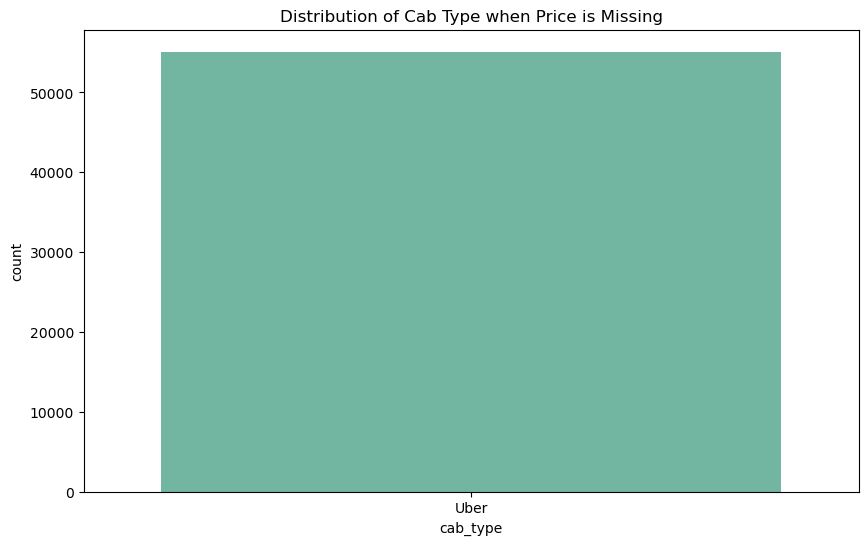

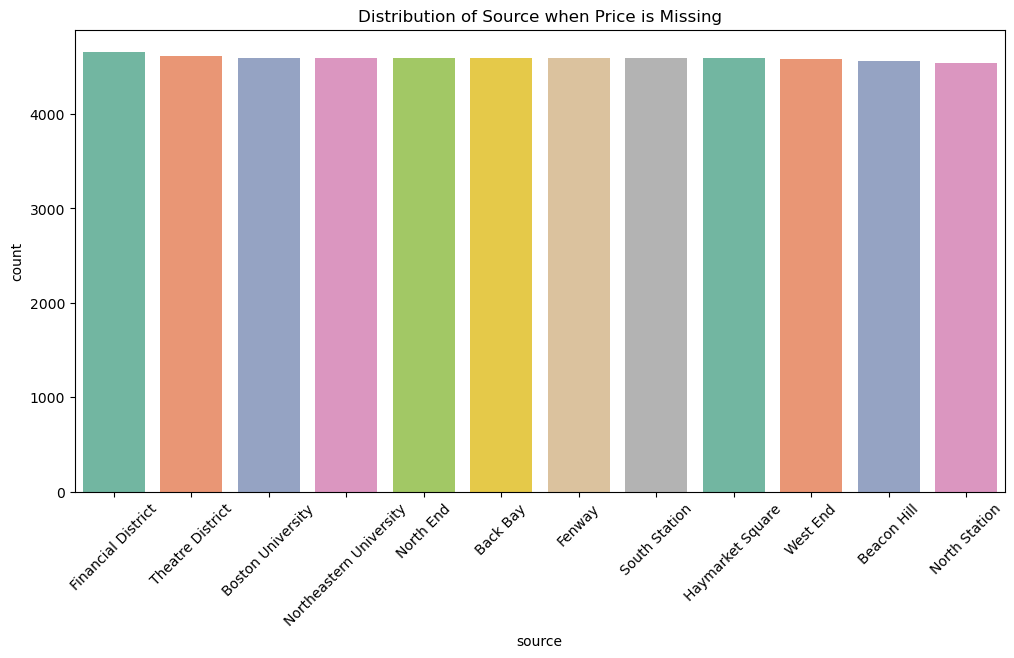

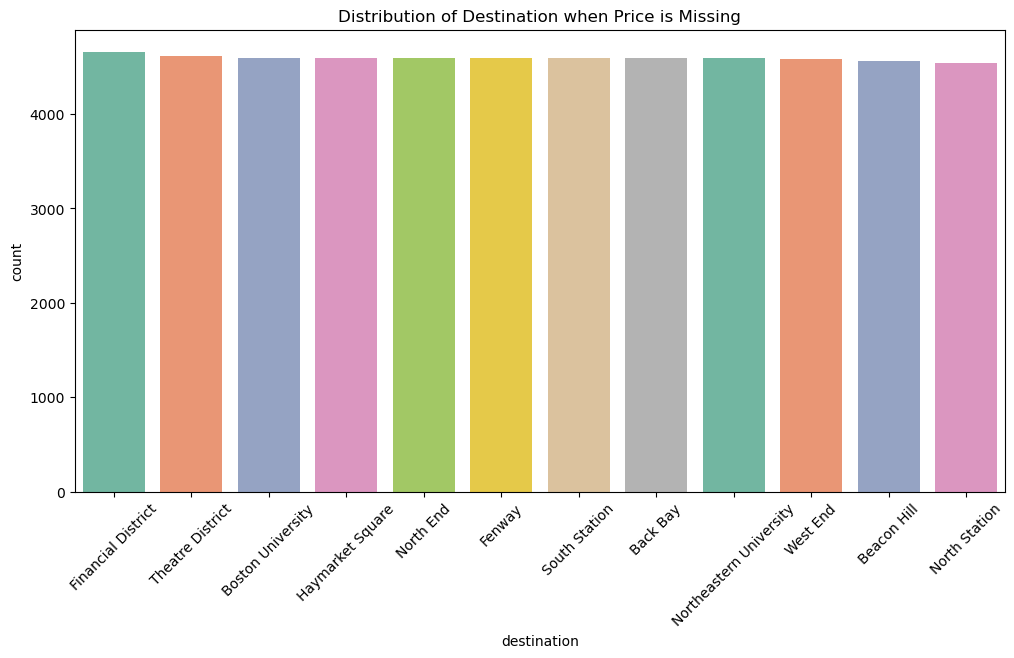

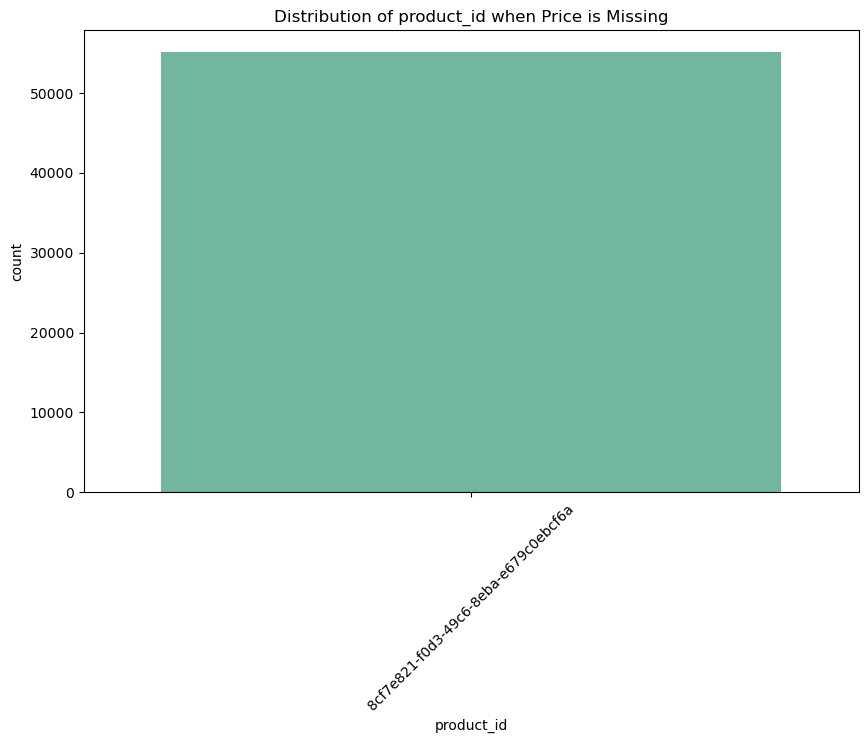

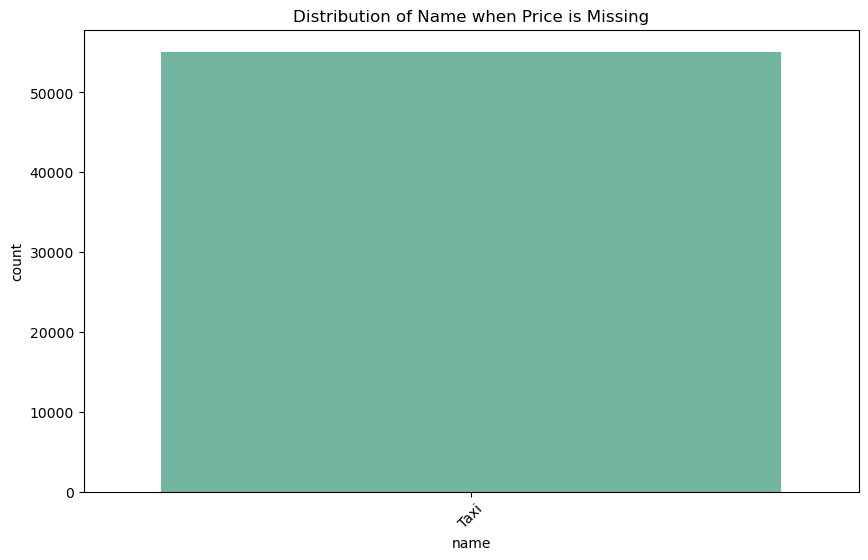

In [23]:
# Distribution of 'cab_type' when 'price' is missing
plt.figure(figsize=(10, 6))
sns.countplot(x='cab_type', data=df_na, palette='Set2')
plt.title('Distribution of Cab Type when Price is Missing')
plt.show()

# Distribution of 'source' when 'price' is missing
plt.figure(figsize=(12, 6))
sns.countplot(x='source', data=df_na, palette='Set2', order=df_na['source'].value_counts().index)
plt.title('Distribution of Source when Price is Missing')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'destination' when 'price' is missing
plt.figure(figsize=(12, 6))
sns.countplot(x='destination', data=df_na, palette='Set2', order=df_na['destination'].value_counts().index)
plt.title('Distribution of Destination when Price is Missing')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'product_id' when 'price' is missing
plt.figure(figsize=(10, 6))
sns.countplot(x='product_id', data=df_na, palette='Set2', order=df_na['product_id'].value_counts().index)
plt.title('Distribution of product_id when Price is Missing')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'name' when 'price' is missing
plt.figure(figsize=(10, 6))
sns.countplot(x='name', data=df_na, palette='Set2', order=df_na['name'].value_counts().index)
plt.title('Distribution of Name when Price is Missing')
plt.xticks(rotation=45)
plt.show()

The histograms above show:
- there are no missing values for Lyft; there are only missing values for Uber. 
- the distibutions of `source` and `destination` when `price` is missing are very evenly spread; there are almost exactly the same number of observations missing `price` for every individual `source` and `destination`.
- the value of `name` for all missing values is 'Taxi'. For `name`, the unique classes are: ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi'].
- the value `product_id` is '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a' for all missing values of `price`.

These final two observations are very interesting; we are unsure what the category 'Taxi' implies or what the given `product_id` means.

Instead of options 1 and 2 above, another option to move forward might be to remove all observations where the variable `name` is equal to 'Taxi'. 

### Missing Values Option 3: Remove all observations where variable `name` is equal to 'Taxi'.

In [24]:
# Remove rows where 'name' is 'Taxi'
df_noTaxi = df[df['name'] != 'Taxi']

# Check the result
print(f"Number of rows after removing 'Taxi': {len(df_noTaxi)}")

Number of rows after removing 'Taxi': 637976


In [25]:
# Confirm that this leaves no missing values.
df_noTaxi.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## Correlation analysis

In [36]:
# Remove 'id' and 'datetime' from the list of column names
num_col = [col for col in num_col if col not in ['id', 'datetime']]

num_df = df[num_col]
correlation_matrix = num_df.corr()

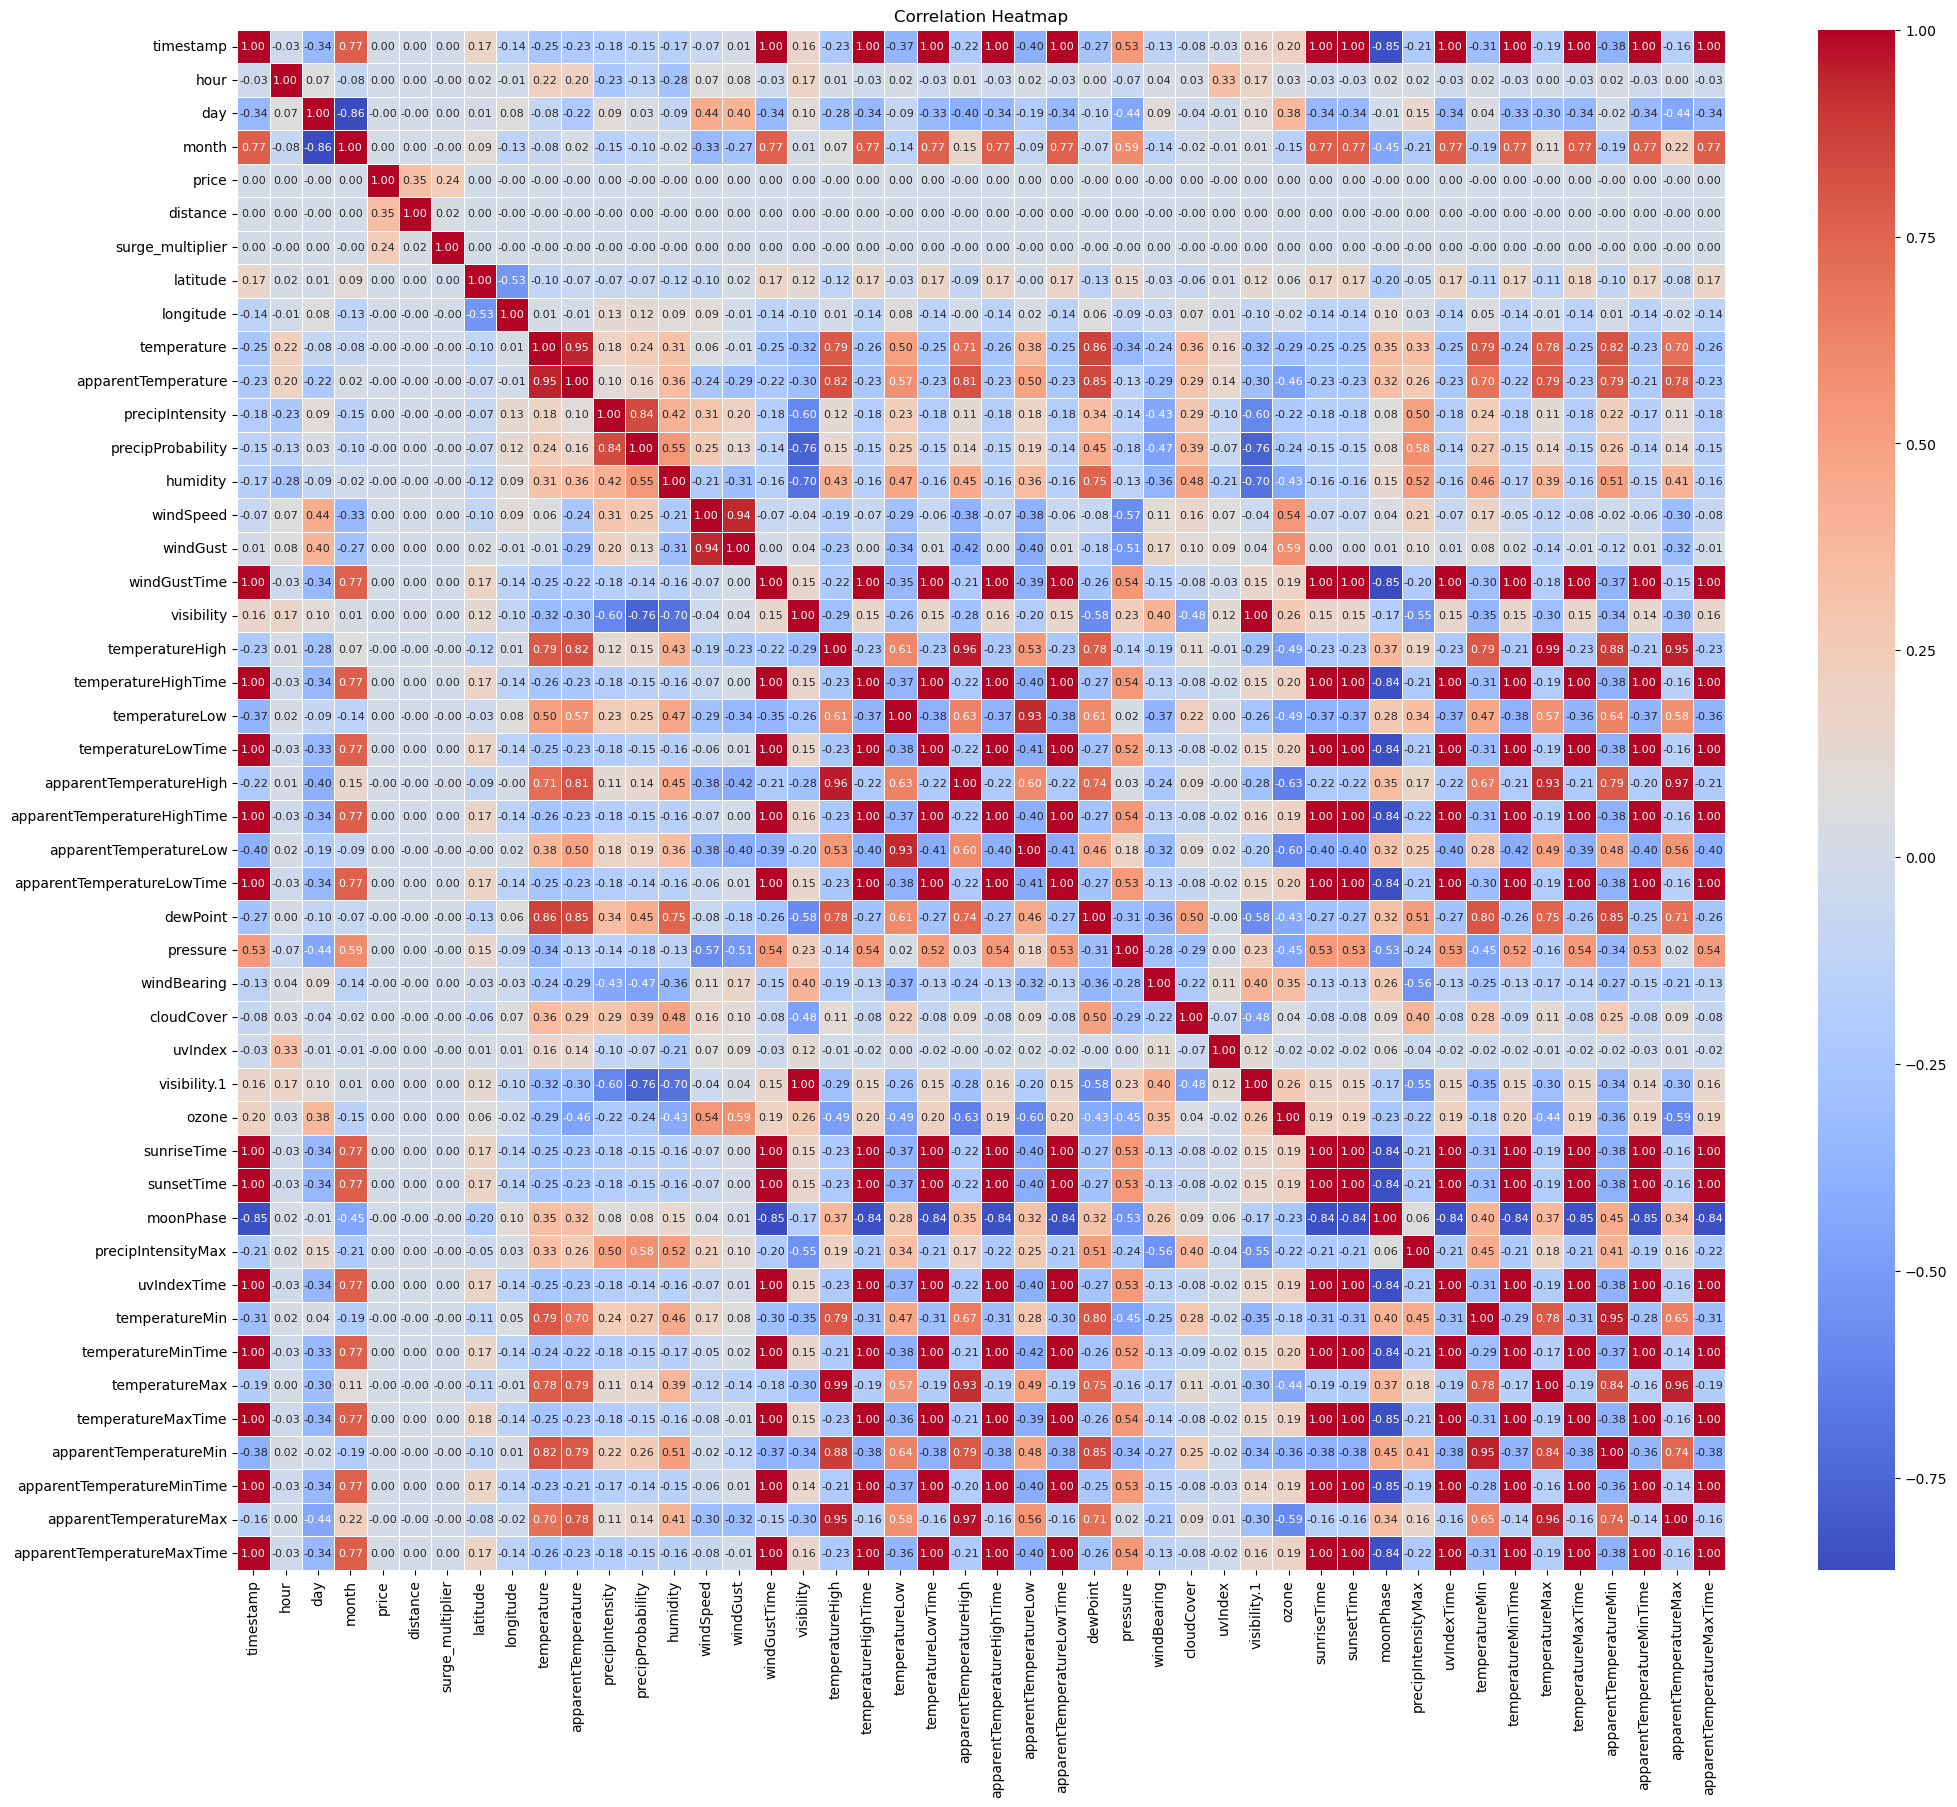

In [37]:
# Calculate correlation matrix
correlation_matrix = num_df.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

In [38]:
num_df.corr().T.style.background_gradient()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

A lot of vairables exhibit high correlation, and high correlation among variables can lead to multicollinearity, which can affect the performance and interpretability of regression models. It also indicates needs for feature engineering, and several methods we are considering to approach this problem is:
- Remove Highly Correlated Variables: Identify and drop one variable from each pair of highly correlated variables.
- Combine Variables using the average of the correlated variables or conducting Principal Component Analysis (PCA)
- Apply regularization Techniques such as L1 or L2
- Apply transformations like logarithmic or polynomial transformations to reduce correlation.
- In cases where two variables are highly correlated but both are important, we might also consider creating interaction terms to capture their joint effect.

Last but not the least, it is important to leverage domain knowledge to determine which variables are most relevant and should be retained.

In [42]:
# Potential variables to drop based on correlation threshold
threshold = 0.85
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Drop columns with high correlation
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
df_reduced = df.drop(columns=to_drop)
print(f"Dropped columns: {to_drop}")

Dropped columns: ['apparentTemperature', 'windGust', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'visibility.1', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
